In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping #for fine tuning
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Input,Dropout

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import matplotlib.font_manager
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
# dataset doesn't have column names, so we have to provide it
Column_Names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [3]:
Df=pd.read_csv("KDDTrain+.csv",header=None,names=Column_Names)

In [4]:
Df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
Df.shape

(125973, 43)

In [6]:
Df.drop("difficulty_level",axis=1,inplace=True)

In [7]:
Df.shape

(125973, 42)

In [8]:
Df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [9]:
Df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
Df["label"].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [12]:
# changing attack labels to their respective attack class
def change_label(df):
    df.label.replace(['back','land','neptune','pod','smurf','teardrop'],'Dos',inplace=True)
    df.label.replace(['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster'],
                     'R2L',inplace=True)
    df.label.replace(['ipsweep','nmap','portsweep','satan'],'Probe',inplace=True)
    df.label.replace(['buffer_overflow','loadmodule','perl','rootkit'],'U2R',inplace=True)

In [13]:
# calling change_label() function
change_label(Df)

In [14]:
# distribution of attack classes
Df.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [15]:
Df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [16]:
# selecting numeric attributes columns from data
numeric_col = Df.select_dtypes(include='number').columns

In [17]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

In [18]:
# data before normalization
Df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [19]:
# calling the normalization() function
Df= normalization(Df.copy(),numeric_col)

In [20]:
# data after normalization
Df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [21]:
# Finding categorical features
num_cols = Df._get_numeric_data().columns

cate_cols = list(set(Df.columns)-set(num_cols))

In [22]:
cate_cols

['label', 'protocol_type', 'flag', 'service']

In [23]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [24]:
# creating a dataframe with only categorical attributes
categorical = Df[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [25]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
list(categorical.columns.values)

['protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_aol',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_harvest',
 'service_hostnames',
 'service_http',
 'service_http_2784',
 'service_http_443',
 'service_http_8001',
 'service_imap4',
 'service_iso_tsap',
 'service_klogin',
 'service_kshell',
 'service_ldap',
 'service_link',
 'service_login',
 'service_mtp',
 'service_name',
 'service_netbios_dgm',
 'service_netbios_ns',
 'service_netbios_ssn',
 'service_netstat',
 'service_nnsp',
 'service_nntp',
 'service_ntp_u',
 'service_other',
 'service_pm_dump',
 'service_pop_2',
 'service_pop_3',
 'service_printer',
 'service_pr

# Binary Classification

In [27]:
# changing attack labels into two categories 'normal' and 'abnormal'
Df2_label = pd.DataFrame(Df.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [28]:
# creating a dataframe with binary labels (normal,abnormal)
Df2 = Df.copy()
Df2['label'] = Df2_label

In [29]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = LabelEncoder()
enc_label = Df2_label.apply(le1.fit_transform)
Df2['intrusion'] = enc_label

In [30]:
Df2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [31]:
# one-hot-encoding attack label
Df2 = pd.get_dummies(Df2,columns=['label'],prefix="",prefix_sep="") 
Df2['label'] = Df2_label
Df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal


In [32]:
Df2.label.value_counts()

normal      67343
abnormal    58630
Name: label, dtype: int64

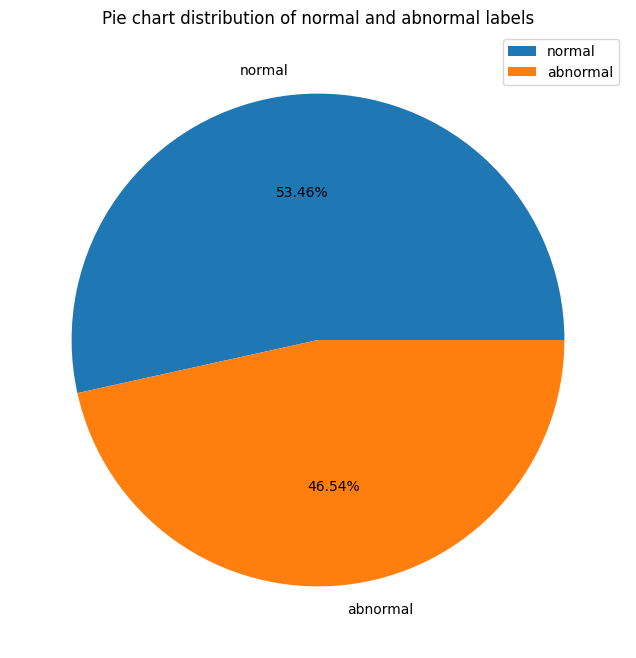

In [33]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(Df2.label.value_counts(),labels=Df2.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

# Multi-class Classification

In [34]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_Df = Df.copy()
multi_label = pd.DataFrame(multi_Df.label)

In [35]:
multi_Df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos


In [36]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_Df['intrusion'] = enc_label

In [37]:
multi_Df = pd.get_dummies(multi_Df,columns=['label'],prefix="",prefix_sep="") 
multi_Df['label'] = multi_label
multi_Df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,0,0,0,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,0,0,0,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,0,0,0,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos


In [38]:
multi_Df.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

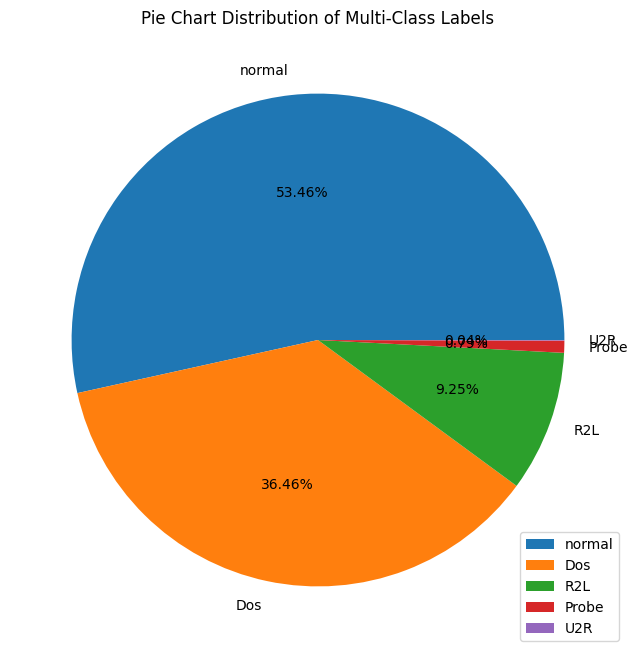

In [39]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_Df.label.value_counts(),labels=multi_Df.label.unique(),autopct='%0.2f%%')
plt.title('Pie Chart Distribution of Multi-Class Labels')
plt.legend()
plt.show()

# Feature Extraction

In [40]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_Df = Df2[numeric_col]
numeric_Df['intrusion'] = Df2['intrusion']

C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_8088\1408514910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_Df['intrusion'] = Df2['intrusion']


In [41]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_Df.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [42]:
# selecting attributes found by using pearson correlation coefficient
numeric_Df=Df2[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                     'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [43]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_Df = numeric_Df.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
Df2 = numeric_Df.join(Df2[['intrusion','abnormal','normal','label']])

In [44]:
Df2

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,abnormal
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,abnormal
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,abnormal


In [45]:
Df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 97 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   count                     125973 non-null  float64
 1   srv_serror_rate           125973 non-null  float64
 2   serror_rate               125973 non-null  float64
 3   dst_host_serror_rate      125973 non-null  float64
 4   dst_host_srv_serror_rate  125973 non-null  float64
 5   logged_in                 125973 non-null  float64
 6   dst_host_same_srv_rate    125973 non-null  float64
 7   dst_host_srv_count        125973 non-null  float64
 8   same_srv_rate             125973 non-null  float64
 9   protocol_type_icmp        125973 non-null  uint8  
 10  protocol_type_tcp         125973 non-null  uint8  
 11  protocol_type_udp         125973 non-null  uint8  
 12  service_IRC               125973 non-null  uint8  
 13  service_X11               125973 non-null  u

In [46]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_Df[numeric_col]
numeric_multi['intrusion'] = multi_Df['intrusion']

C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_8088\2100262845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_Df['intrusion']


In [47]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [48]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_Df[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [49]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_Df = numeric_multi.join(multi_Df[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [50]:
multi_Df

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,Dos
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,Dos


In [51]:
X = Df2.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = Df2['intrusion'] # target attribute

In [52]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

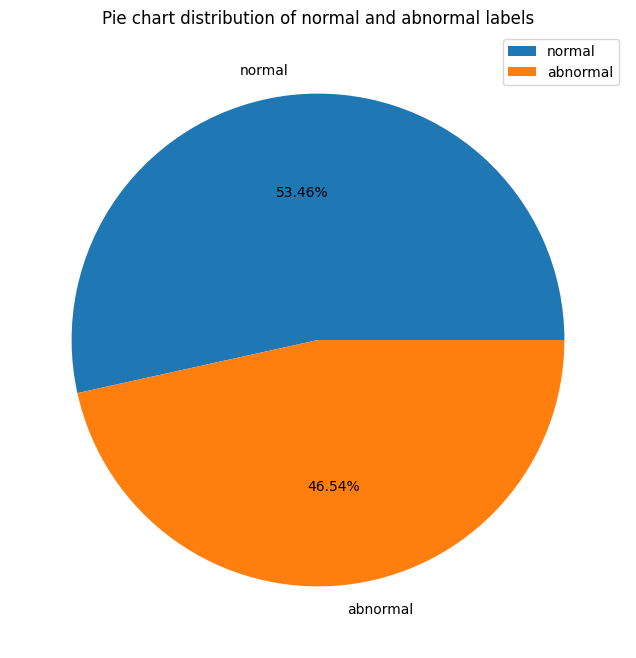

In [53]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(Df2.label.value_counts(),labels=Df2.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [54]:
# splitting the dataset 75% for training and 25% testing
X_train_binary, X_test_binary, Y_train_binary, Y_test_binary = train_test_split(X,Y, test_size=0.25, random_state=42)

In [55]:
X = multi_Df.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_Df['intrusion'] # target attributes

In [56]:
# splitting the dataset 75% for training and 25% testing
X_train_multi_Df, X_test_multi_Df, Y_train_multi_Df, Y_test_multi_Df = train_test_split(X,Y, test_size=0.25, random_state=42)

# Logistic Regression

In [57]:
LR =LogisticRegression(random_state=101)

In [58]:
LR.fit(X_train_binary,Y_train_binary)

C:\ProgramData\Anaconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=101)

In [59]:
#Predicting the test set result
y_pred=LR.predict(X_test_binary)
ac=accuracy_score(Y_test_binary, y_pred)*100 # calculating accuracy of predicted data
print("The Accuracy of Logistic Regression Algorithm is ", ac)

The Accuracy of Logistic Regression Algorithm is  96.96767638280306


In [60]:
print(classification_report(Y_test_binary, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.98      0.96      0.97     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [61]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test_binary, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test_binary, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test_binary, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(Y_test_binary, y_pred)*100)
print("Accuracy - ",accuracy_score(Y_test_binary,y_pred)*100)

Mean Absolute Error -  0.030323236171969265
Mean Squared Error -  0.030323236171969265
Root Mean Squared Error -  0.17413568322422968
R2 Score -  87.85413850563243
Accuracy -  96.96767638280306


# Decision Tree Classifier (Binary Classification)

In [62]:
DTC=DecisionTreeClassifier(random_state=0)
DTC.fit(X_train_binary,Y_train_binary)

DecisionTreeClassifier(random_state=0)

In [63]:
#Predicting the test set result  
y_pred=DTC.predict(X_test_binary)
ac=accuracy_score(Y_test_binary, y_pred)*100 # calculating accuracy of predicted data
print("Decision Tree Classifier Binary Set-Accuracy is ", ac)

Decision Tree Classifier Binary Set-Accuracy is  98.5552803708643


In [64]:
print(classification_report(Y_test_binary, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.98      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



In [65]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test_binary, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test_binary, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test_binary, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(Y_test_binary, y_pred)*100)
print("Accuracy - ",accuracy_score(Y_test_binary,y_pred)*100)

Mean Absolute Error -  0.014447196291357083
Mean Squared Error -  0.014447196291357083
Root Mean Squared Error -  0.12019649034542183
R2 Score -  94.19650453794952
Accuracy -  98.5552803708643


C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_8088\3936456059.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(Y_test_binary[300:600].values,label="real values", linewidth=2.0)


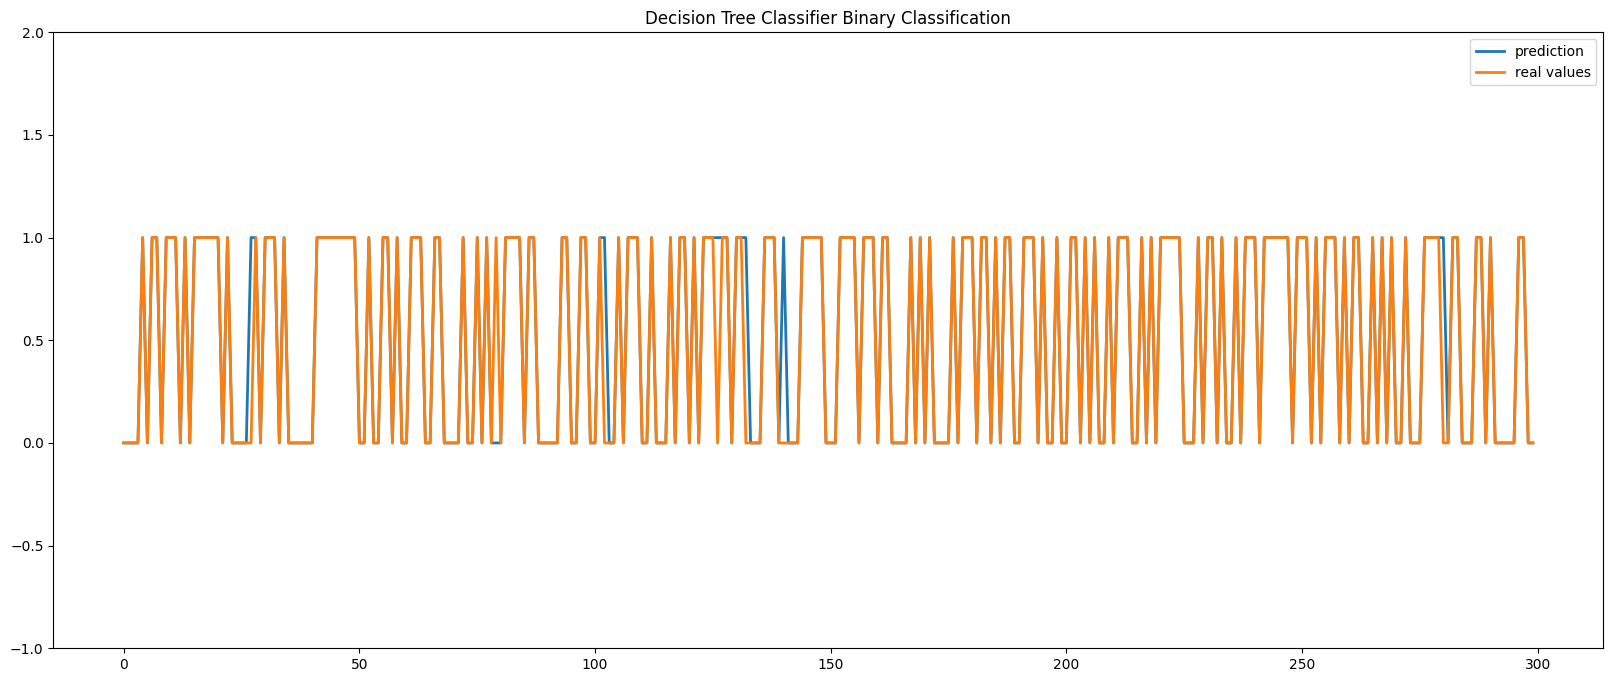

In [66]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:600], label="prediction",linewidth=2.0)
plt.plot(Y_test_binary[300:600].values,label="real values", linewidth=2.0)
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Decision Tree Classifier Binary Classification")
plt.show()

# Decision Tree Classifier (Multi Class Classification)

In [67]:
DTC=DecisionTreeClassifier(random_state=111)
DTC.fit(X_train_multi_Df,Y_train_multi_Df)

DecisionTreeClassifier(random_state=111)

In [68]:
y_pred=DTC.predict(X_test_multi_Df) # predicting target attribute on testing dataset
ac=accuracy_score(Y_test_multi_Df, y_pred)*100 # calculating accuracy of predicted data
print("Decision Tree Classifier multi-class classification Set-Accuracy is ", ac)

Decision Tree Classifier multi-class classification Set-Accuracy is  98.32349018860735


In [69]:
print(classification_report(Y_test_multi_Df, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.97      0.97      2947
         R2L       0.83      0.87      0.85       274
         U2R       0.25      0.13      0.17        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.80      0.79      0.79     31494
weighted avg       0.98      0.98      0.98     31494



In [70]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test_multi_Df, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test_multi_Df, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test_multi_Df, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(Y_test_multi_Df, y_pred)*100)
print("Accuracy - ",accuracy_score(Y_test_multi_Df,y_pred)*100)

Mean Absolute Error -  0.049787261065599796
Mean Squared Error -  0.16822251857496667
Root Mean Squared Error -  0.41014938568156684
R2 Score -  95.35820057144171
Accuracy -  98.32349018860735


C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_8088\1059532328.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(Y_test_multi_Df[500:600].values,label="real values", linewidth=2.0)


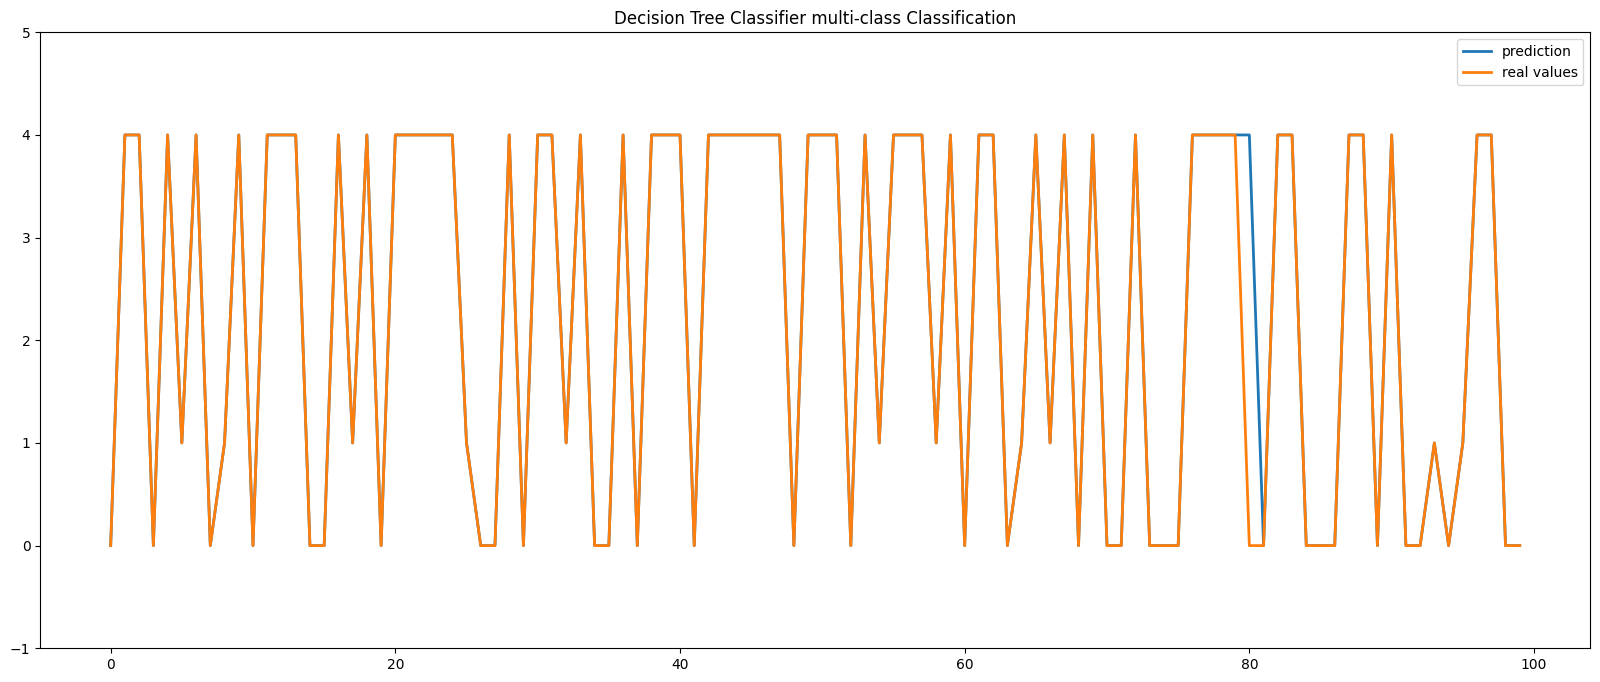

In [71]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction",linewidth=2.0)
plt.plot(Y_test_multi_Df[500:600].values,label="real values", linewidth=2.0)
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Decision Tree Classifier multi-class Classification")
plt.show()

# Support Vector Classifier (Binary Classification)

In [72]:
svm=SVC(kernel='linear',C=1)
svm.fit(X_train_binary,Y_train_binary)

SVC(C=1, kernel='linear')

In [73]:
y_pred=svm.predict(X_test_binary) # predicting target attribute on testing dataset
ac=accuracy_score(Y_test_binary, y_pred)*100 # calculating accuracy of predicted data
print("Support Vector Classification(SVC) Binary Classification Set-Accuracy is ", ac)

Support Vector Classification(SVC) Binary Classification Set-Accuracy is  96.68508287292818


In [74]:
print(classification_report(Y_test_binary, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [75]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test_binary, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test_binary, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test_binary, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(Y_test_binary, y_pred)*100)
print("Accuracy - ",accuracy_score(Y_test_binary,y_pred)*100)

Mean Absolute Error -  0.03314917127071823
Mean Squared Error -  0.03314917127071823
Root Mean Squared Error -  0.18206913871032132
R2 Score -  86.69380115966221
Accuracy -  96.68508287292818


C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_8088\273798488.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(Y_test_binary[500:600].values,label="real values", linewidth=2.0)


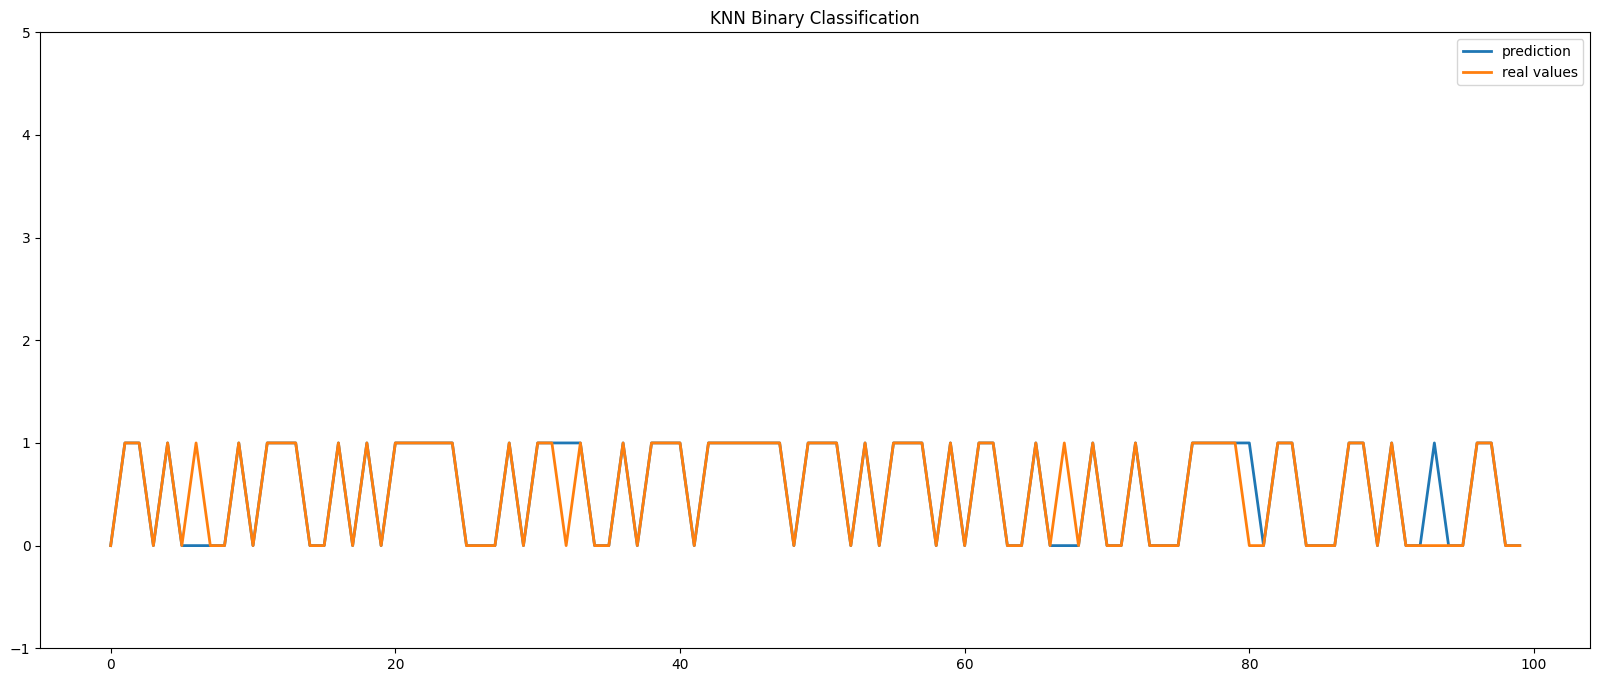

In [76]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction",linewidth=2.0)
plt.plot(Y_test_binary[500:600].values,label="real values", linewidth=2.0)
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("KNN Binary Classification")
plt.show()

# Support Vector Classifier(Multi-Class Classification)

In [77]:
svm=SVC(kernel='linear',C=1)
svm.fit(X_train_multi_Df,Y_train_multi_Df)

SVC(C=1, kernel='linear')

In [78]:
y_pred=svm.predict(X_test_multi_Df) # predicting target attribute on testing dataset
ac=accuracy_score(Y_test_multi_Df, y_pred)*100 # calculating accuracy of predicted data
print("Support Vector Classification(SVC) multi-class Classification Set-Accuracy is ", ac)

Support Vector Classification(SVC) multi-class Classification Set-Accuracy is  95.24988886772083


In [79]:
print(classification_report(Y_test_multi_Df, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.95      0.96      0.96     11484
       Probe       0.86      0.79      0.82      2947
         R2L       0.61      0.60      0.61       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.68      0.67      0.67     31494
weighted avg       0.95      0.95      0.95     31494



C:\ProgramData\Anaconda3\envs\machinelearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\machinelearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\machinelearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [80]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test_multi_Df, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test_multi_Df, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test_multi_Df, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(Y_test_multi_Df, y_pred)*100)
print("Accuracy - ",accuracy_score(Y_test_multi_Df,y_pred)*100)

Mean Absolute Error -  0.10125738235854448
Mean Squared Error -  0.2831967993903601
Root Mean Squared Error -  0.5321623806606026
R2 Score -  92.1868366533396
Accuracy -  95.24988886772083


C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_8088\1736615747.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(Y_test_multi_Df[500:600].values,label="real values", linewidth=2.0)


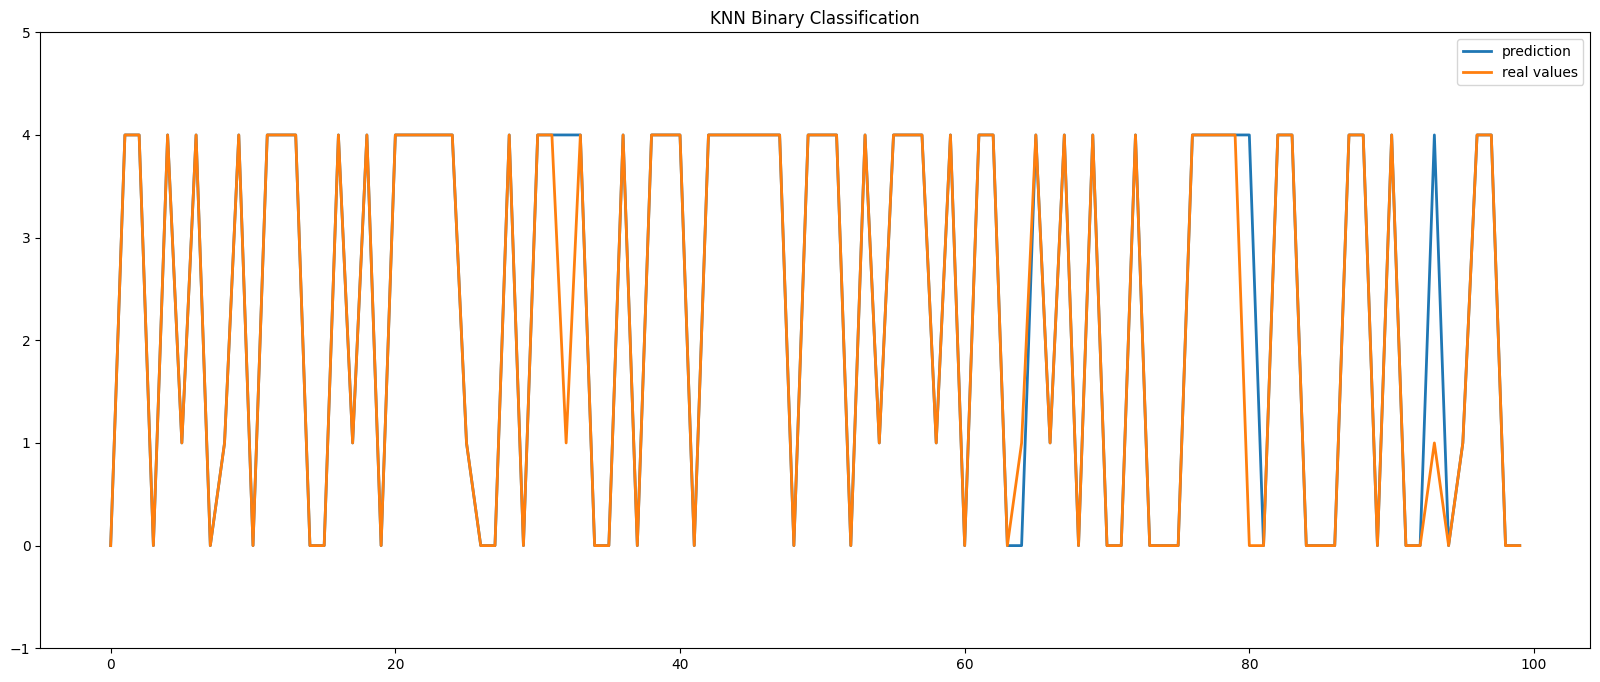

In [81]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction",linewidth=2.0)
plt.plot(Y_test_multi_Df[500:600].values,label="real values", linewidth=2.0)
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("KNN Binary Classification")
plt.show()

# K-nearest-neighbor Classifier (Binary Classification)

In [82]:
Knn=KNeighborsClassifier() # creating model for 5 neighbors
Knn.fit(X_train_binary,Y_train_binary) # training model on training dataset

KNeighborsClassifier()

In [83]:
y_pred=Knn.predict(X_test_binary) # predicting target attribute on testing dataset
ac=accuracy_score(Y_test_binary, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.5552803708643


In [84]:
print(classification_report(Y_test_binary, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



In [85]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test_binary, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test_binary, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test_binary, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(Y_test_binary, y_pred)*100)
print("Accuracy - ",accuracy_score(Y_test_binary,y_pred)*100)

Mean Absolute Error -  0.014447196291357083
Mean Squared Error -  0.014447196291357083
Root Mean Squared Error -  0.12019649034542183
R2 Score -  94.19668921817409
Accuracy -  98.5552803708643


C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_8088\4157551429.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(Y_test_binary[500:600].values,label="real values", linewidth=2.0)


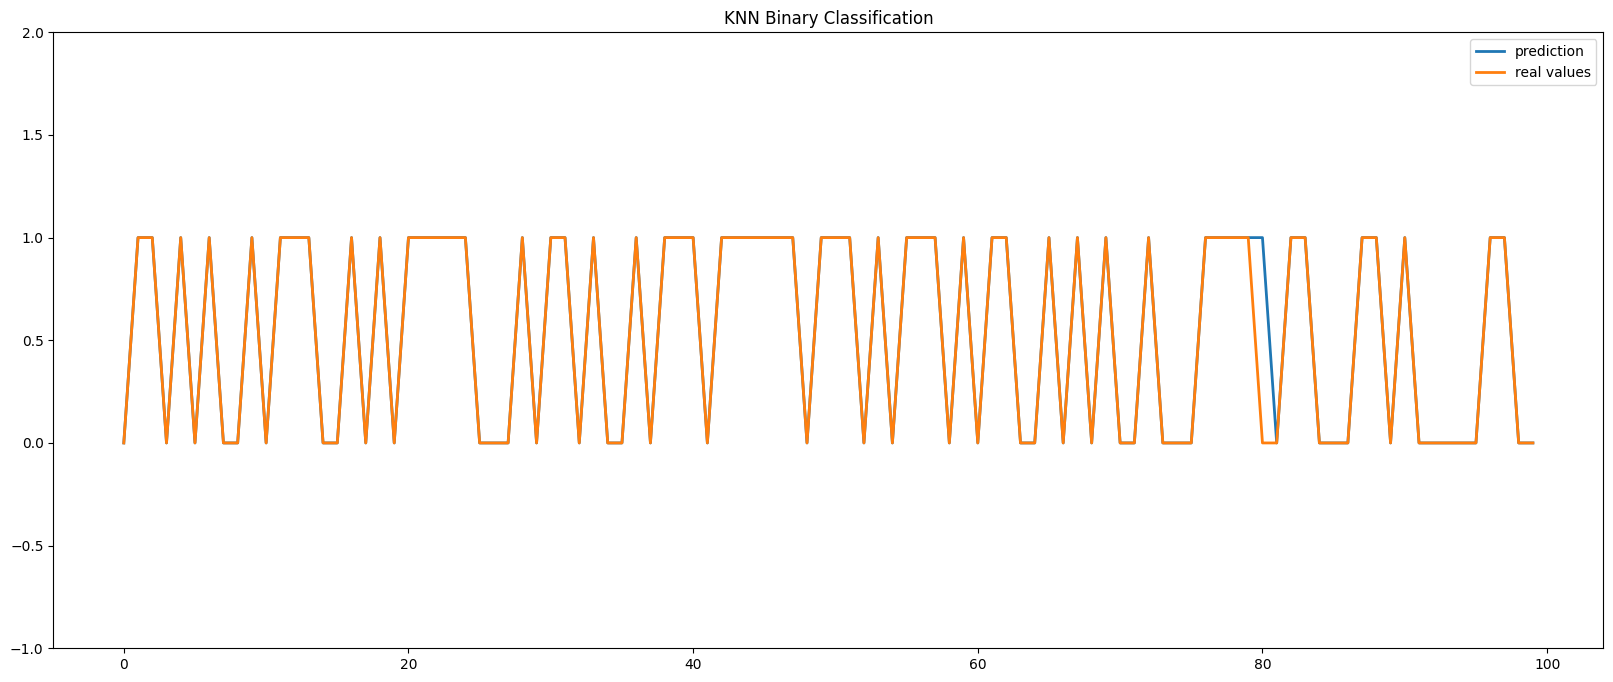

In [86]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction",linewidth=2.0)
plt.plot(Y_test_binary[500:600].values,label="real values", linewidth=2.0)
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("KNN Binary Classification")
plt.show()

## K-nearest-neighbor Classifier (Multi-class Classification)

In [87]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_multi_Df,Y_train_multi_Df) # training model on training dataset

KNeighborsClassifier()

In [88]:
y_pred=knn.predict(X_test_multi_Df)  # predicting target attribute on testing dataset
ac=accuracy_score(Y_test_multi_Df, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

KNN-Classifier Multi-class Set-Accuracy is  98.29491331682225


In [89]:
# classification report
print(classification_report(Y_test_multi_Df, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.96      0.96      2947
         R2L       0.89      0.87      0.88       274
         U2R       0.40      0.13      0.20        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.84      0.79      0.80     31494
weighted avg       0.98      0.98      0.98     31494



In [90]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(Y_test_multi_Df, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(Y_test_multi_Df, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(Y_test_multi_Df, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(Y_test_multi_Df, y_pred)*100)
print("Accuracy - ",accuracy_score(Y_test_multi_Df,y_pred)*100)

Mean Absolute Error -  0.050263542262018165
Mean Squared Error -  0.16939734552613195
Root Mean Squared Error -  0.411579087814398
R2 Score -  95.32594781621742
Accuracy -  98.29491331682225


C:\Users\JOY DAS\AppData\Local\Temp\ipykernel_8088\2257179861.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(Y_test_multi_Df[500:600].values, label="real_values", linewidth=2.0,color="red")


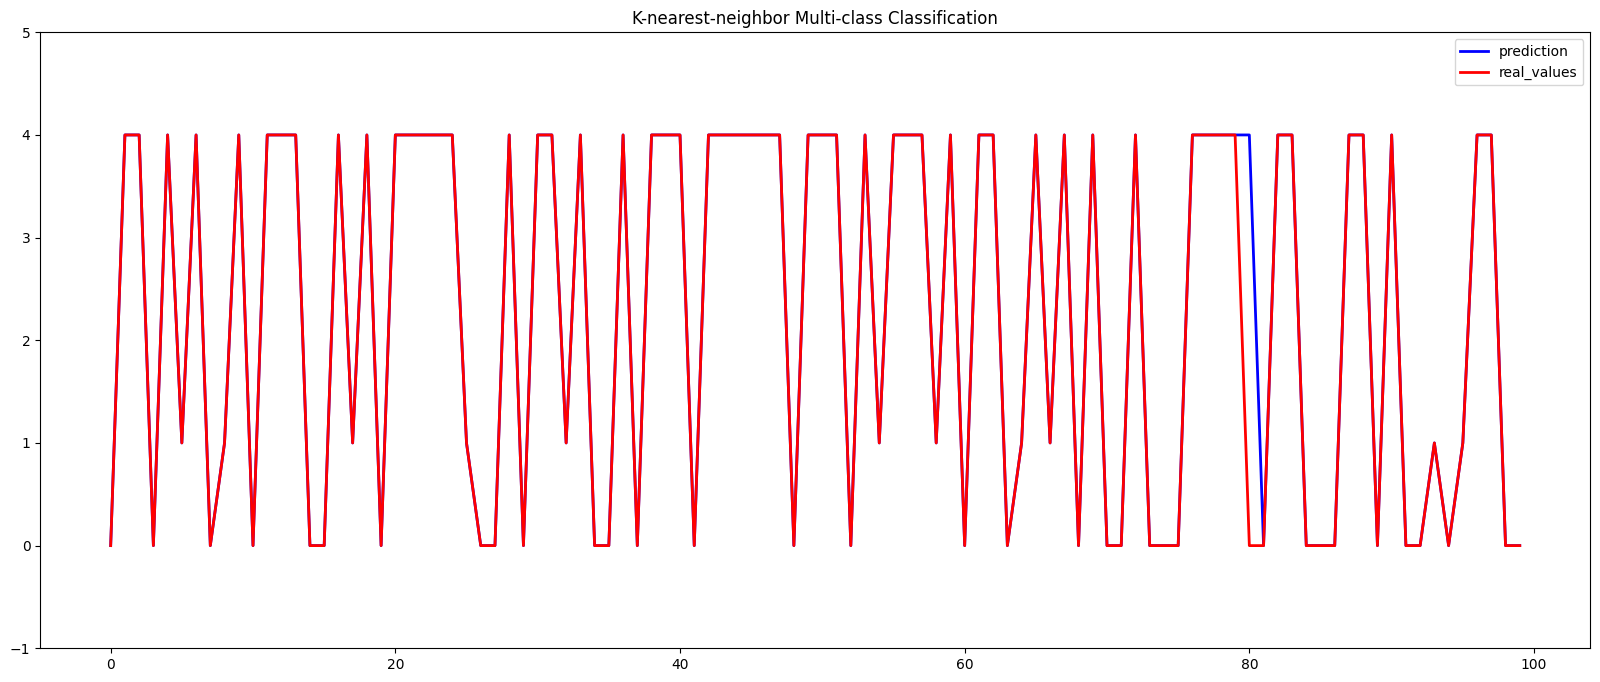

In [91]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test_multi_Df[500:600].values, label="real_values", linewidth=2.0,color="red")
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("K-nearest-neighbor Multi-class Classification")
plt.show()

## Multi Layer Perceptron Classifier (Binary Classification)

In [92]:
mlp = Sequential() # creating model
# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train_binary.shape[1], activation='relu'))
mlp.add(Dense(128,activation="relu"))
mlp.add(Dense(256,activation="relu"))
mlp.add(Dense(128,activation="relu"))
mlp.add(Dense(64,activation="relu"))
mlp.add(Dense(32,activation="relu"))
mlp.add(Dense(10,activation="relu"))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

In [93]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4700      
                                                                 
 dense_1 (Dense)             (None, 128)               6528      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                3

In [95]:
Train=mlp.fit(X_train_binary, Y_train_binary, epochs=100, batch_size=5000,validation_split=0.2)

C:\ProgramData\Anaconda3\envs\machinelearning\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
16/16 [==============================] - 10s 308ms/step - loss: 0.5504 - accuracy: 0.8516 - val_loss: 0.2709 - val_accuracy: 0.9060
Epoch 2/100
16/16 [==============================] - 4s 236ms/step - loss: 0.1605 - accuracy: 0.9550 - val_loss: 0.1070 - val_accuracy: 0.9682
Epoch 3/100
16/16 [==============================] - 2s 109ms/step - loss: 0.0911 - accuracy: 0.9692 - val_loss: 0.0808 - val_accuracy: 0.9702
Epoch 4/100
16/16 [==============================] - 2s 135ms/step - loss: 0.0741 - accuracy: 0.9734 - val_loss: 0.0740 - val_accuracy: 0.9731
Epoch 5/100
16/16 [==============================] - 2s 106ms/step - loss: 0.0703 - accuracy: 0.9755 - val_loss: 0.0709 - val_accuracy: 0.9764
Epoch 6/100
16/16 [==============================] - 2s 111ms/step - loss: 0.0676 - accuracy: 0.9769 - val_loss: 0.0676 - val_accuracy: 0.9759
Epoch 7/100
16/16 [==============================] - 2s 110ms/step - loss: 0.0646 - accuracy: 0.9783 - val_loss: 0.0659 - val_accuracy: 0.977

Epoch 58/100
16/16 [==============================] - 2s 137ms/step - loss: 0.0492 - accuracy: 0.9832 - val_loss: 0.0519 - val_accuracy: 0.9826
Epoch 59/100
16/16 [==============================] - 2s 111ms/step - loss: 0.0492 - accuracy: 0.9832 - val_loss: 0.0518 - val_accuracy: 0.9820
Epoch 60/100
16/16 [==============================] - 2s 113ms/step - loss: 0.0479 - accuracy: 0.9834 - val_loss: 0.0528 - val_accuracy: 0.9824
Epoch 61/100
16/16 [==============================] - 2s 136ms/step - loss: 0.0476 - accuracy: 0.9836 - val_loss: 0.0556 - val_accuracy: 0.9809
Epoch 62/100
16/16 [==============================] - 2s 112ms/step - loss: 0.0485 - accuracy: 0.9832 - val_loss: 0.0583 - val_accuracy: 0.9794
Epoch 63/100
16/16 [==============================] - 2s 113ms/step - loss: 0.0483 - accuracy: 0.9834 - val_loss: 0.0530 - val_accuracy: 0.9816
Epoch 64/100
16/16 [==============================] - 2s 128ms/step - loss: 0.0482 - accuracy: 0.9833 - val_loss: 0.0543 - val_accuracy:

In [96]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test_binary, Y_test_binary, verbose=1)

985/985 [==============================] - 3s 2ms/step - loss: 0.0498 - accuracy: 0.9845


In [97]:
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

Test results - Loss: 0.04981318116188049 - Accuracy: 98.45049977302551


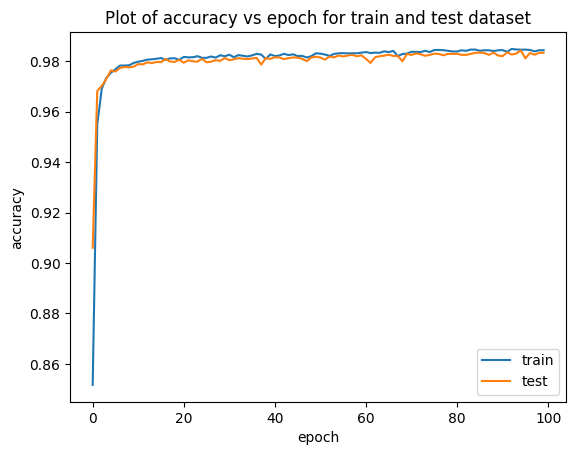

In [98]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(Train.history['accuracy'])
plt.plot(Train.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

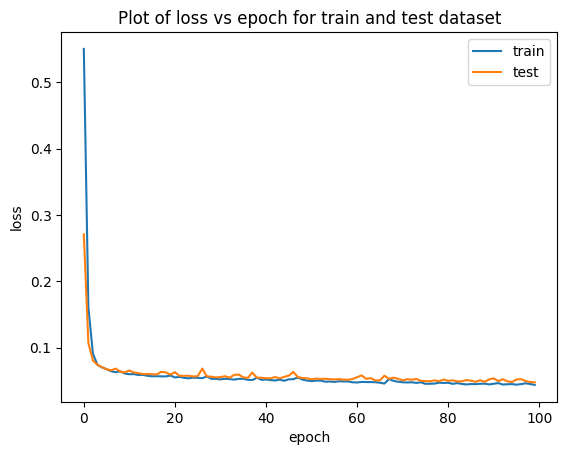

In [99]:
# Plot of loss vs epoch of train and test dataset
plt.plot(Train.history['loss'])
plt.plot(Train.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [100]:
Y_pred = mlp.predict(X_test_binary).ravel()
fpr, tpr, thresholds = roc_curve(Y_test_binary, Y_pred)
auc = auc(fpr, tpr)

985/985 [==============================] - 5s 1ms/step


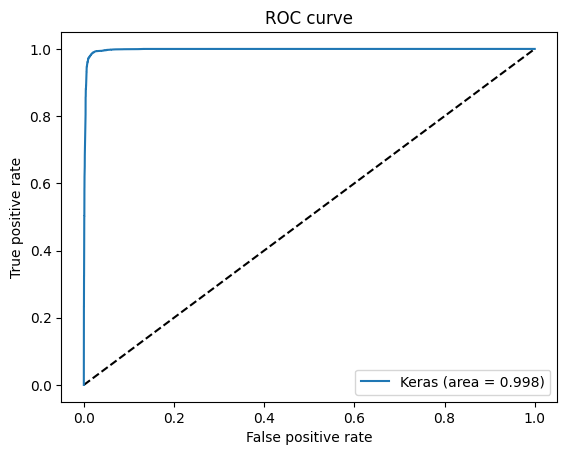

In [101]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [102]:
pred = mlp.predict(X_test_binary)
y_classes = (mlp.predict(X_test_binary)>0.5).astype('int32')

985/985 [==============================] - 3s 2ms/step


In [103]:
print("Recall Score - ",recall_score(Y_test_binary,y_classes))
print("F1 Score - ",f1_score(Y_test_binary,y_classes))
print("Precision Score - ",precision_score(Y_test_binary,y_classes))

Recall Score -  0.9917729819959461
F1 Score -  0.9855450236966824
Precision Score -  0.9793947957141175


## Multi Layer Perceptron Classifier (Multi-class Classification)

In [104]:
Y=keras.utils.to_categorical(Y)

In [105]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2)

In [106]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(64,input_shape=(X.shape[1],)))
mlp.add(Dense(32,activation='relu'))
# output layer with softmax activation
mlp.add(Dense(5,activation='softmax'))

In [107]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
# summary of model layers
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                6016      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 5)                 165       
                                                                 
Total params: 8,261
Trainable params: 8,261
Non-trainable params: 0
_________________________________________________________________


In [109]:
# training the model on training dataset
history = mlp.fit(x_train, y_train, epochs=100, batch_size=32,validation_split=0.2)

Epoch 1/100
2520/2520 [==============================] - 14s 4ms/step - loss: 0.1459 - accuracy: 0.9538 - val_loss: 0.0942 - val_accuracy: 0.9677
Epoch 2/100
2520/2520 [==============================] - 8s 3ms/step - loss: 0.0898 - accuracy: 0.9693 - val_loss: 0.0846 - val_accuracy: 0.9725
Epoch 3/100
2520/2520 [==============================] - 6s 3ms/step - loss: 0.0807 - accuracy: 0.9734 - val_loss: 0.0756 - val_accuracy: 0.9744
Epoch 4/100
2520/2520 [==============================] - 6s 2ms/step - loss: 0.0757 - accuracy: 0.9747 - val_loss: 0.0794 - val_accuracy: 0.9755
Epoch 5/100
2520/2520 [==============================] - 6s 2ms/step - loss: 0.0728 - accuracy: 0.9754 - val_loss: 0.0759 - val_accuracy: 0.9734
Epoch 6/100
2520/2520 [==============================] - 6s 3ms/step - loss: 0.0700 - accuracy: 0.9762 - val_loss: 0.0720 - val_accuracy: 0.9755
Epoch 7/100
2520/2520 [==============================] - 6s 2ms/step - loss: 0.0683 - accuracy: 0.9772 - val_loss: 0.0715 - val_a

2520/2520 [==============================] - 6s 2ms/step - loss: 0.0553 - accuracy: 0.9813 - val_loss: 0.0648 - val_accuracy: 0.9807
Epoch 58/100
2520/2520 [==============================] - 7s 3ms/step - loss: 0.0549 - accuracy: 0.9817 - val_loss: 0.0647 - val_accuracy: 0.9792
Epoch 59/100
2520/2520 [==============================] - 6s 2ms/step - loss: 0.0546 - accuracy: 0.9813 - val_loss: 0.0674 - val_accuracy: 0.9793
Epoch 60/100
2520/2520 [==============================] - 6s 2ms/step - loss: 0.0549 - accuracy: 0.9814 - val_loss: 0.0674 - val_accuracy: 0.9791
Epoch 61/100
2520/2520 [==============================] - 6s 2ms/step - loss: 0.0550 - accuracy: 0.9814 - val_loss: 0.0629 - val_accuracy: 0.9801
Epoch 62/100
2520/2520 [==============================] - 6s 2ms/step - loss: 0.0549 - accuracy: 0.9815 - val_loss: 0.0647 - val_accuracy: 0.9801
Epoch 63/100
2520/2520 [==============================] - 7s 3ms/step - loss: 0.0547 - accuracy: 0.9815 - val_loss: 0.0612 - val_accuracy

In [115]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

788/788 [==============================] - 3s 2ms/step - loss: 0.0679 - accuracy: 0.9811
Test results - Loss: 0.06785773485898972 - Accuracy: 98.11073541641235%


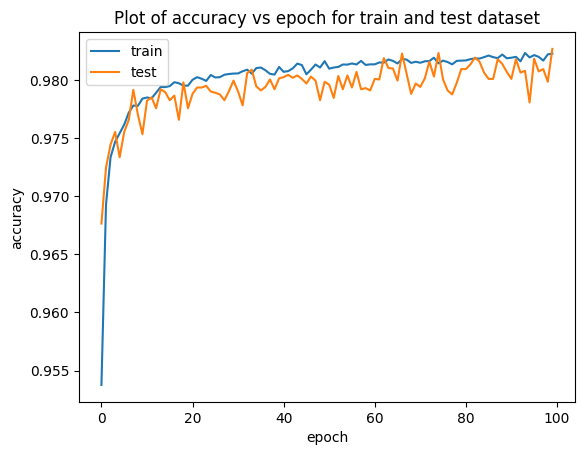

In [116]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

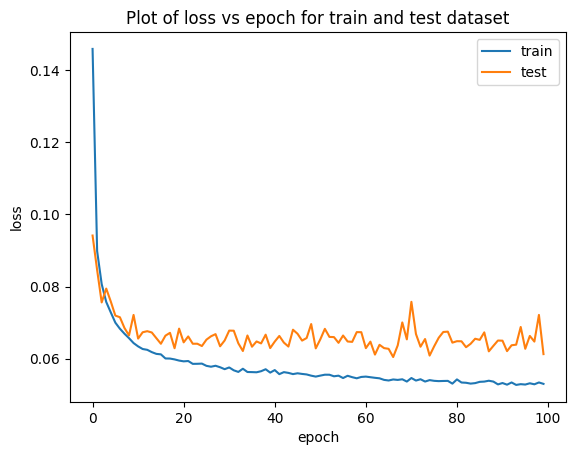

In [117]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [118]:
n_classes = len(le2.classes_)
n_classes

5

In [119]:
y_pred = mlp.predict(x_test)

788/788 [==============================] - 5s 1ms/step


# Auto Encoder (Binary Classification)

In [120]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(Df2, test_size=0.25, random_state=42)

In [121]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

Y_test = X_test['intrusion'] # target attribute
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [122]:
X_train = X_train.values
X_test = X_test.values
Y_test = Y_test.values

In [123]:
input_dim=X_train.shape[1]
Encoding_dim=32
input_layer= Input(shape=(input_dim,))
Encoder=Dense(Encoding_dim,activation="relu")(input_layer)
Decoder=Dense(input_dim,activation="softmax")(Encoder)

In [124]:
Autoencoder=Model(input_layer,Decoder)

In [125]:
Autoencoder.compile(optimizer="adam",loss="mean_squared_error",metrics=["accuracy"])

In [126]:
Autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_11 (Dense)            (None, 32)                3008      
                                                                 
 dense_12 (Dense)            (None, 93)                3069      
                                                                 
Total params: 6,077
Trainable params: 6,077
Non-trainable params: 0
_________________________________________________________________


In [127]:
# fine-tune the model on the intrusion detection task
early_stopping = EarlyStopping(patience=10)
Autoencoder.fit(X_train,X_train,epochs=100,batch_size=128,validation_data=(X_test,X_test), 
                callbacks=[early_stopping])

Epoch 1/100
739/739 [==============================] - 10s 8ms/step - loss: 0.1083 - accuracy: 0.5016 - val_loss: 0.1053 - val_accuracy: 0.7478
Epoch 2/100
739/739 [==============================] - 5s 6ms/step - loss: 0.1049 - accuracy: 0.7781 - val_loss: 0.1051 - val_accuracy: 0.8004
Epoch 3/100
739/739 [==============================] - 3s 4ms/step - loss: 0.1047 - accuracy: 0.8354 - val_loss: 0.1048 - val_accuracy: 0.8208
Epoch 4/100
739/739 [==============================] - 3s 4ms/step - loss: 0.1046 - accuracy: 0.8523 - val_loss: 0.1048 - val_accuracy: 0.8459
Epoch 5/100
739/739 [==============================] - 3s 4ms/step - loss: 0.1046 - accuracy: 0.8603 - val_loss: 0.1048 - val_accuracy: 0.8844
Epoch 6/100
739/739 [==============================] - 3s 4ms/step - loss: 0.1044 - accuracy: 0.8442 - val_loss: 0.1046 - val_accuracy: 0.8485
Epoch 7/100
739/739 [==============================] - 3s 4ms/step - loss: 0.1044 - accuracy: 0.8537 - val_loss: 0.1046 - val_accuracy: 0.873

Epoch 58/100
739/739 [==============================] - 7s 10ms/step - loss: 0.1043 - accuracy: 0.9181 - val_loss: 0.1046 - val_accuracy: 0.9616
Epoch 59/100
739/739 [==============================] - 6s 9ms/step - loss: 0.1043 - accuracy: 0.9182 - val_loss: 0.1046 - val_accuracy: 0.9420
Epoch 60/100
739/739 [==============================] - 8s 11ms/step - loss: 0.1043 - accuracy: 0.9192 - val_loss: 0.1046 - val_accuracy: 0.9174
Epoch 61/100
739/739 [==============================] - 7s 9ms/step - loss: 0.1043 - accuracy: 0.9176 - val_loss: 0.1046 - val_accuracy: 0.9585
Epoch 62/100
739/739 [==============================] - 12s 17ms/step - loss: 0.1043 - accuracy: 0.9190 - val_loss: 0.1046 - val_accuracy: 0.9292
Epoch 63/100
739/739 [==============================] - 9s 12ms/step - loss: 0.1043 - accuracy: 0.9183 - val_loss: 0.1046 - val_accuracy: 0.9420
Epoch 64/100
739/739 [==============================] - 5s 7ms/step - loss: 0.1043 - accuracy: 0.9194 - val_loss: 0.1046 - val_accu

In [128]:
# predicting target attribute on testing dataset
test_results = Autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 10s 6ms/step - loss: 0.1046 - accuracy: 0.9184
Test results - Loss: 0.10456842184066772 - Accuracy: 91.83971285820007%


# Auto Encoder (Multi-Class Classification)

In [177]:
X_train, X_test = train_test_split(multi_Df, test_size=0.25, random_state=42)

In [178]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
Y_train = X_train[['Dos','normal','Probe','R2L','U2R']]

X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

#y_test = X_test['intrusion'] # target attribute
Y_test = X_test[['Dos','normal','Probe','R2L','U2R']]

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

In [179]:
X = multi_Df.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_Df[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [180]:
X_train = X_train.values
X_test = X_test.values
Y_test = Y_test.values

In [181]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [182]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [183]:
# summary of model layers
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_17 (Dense)            (None, 50)                4700      
                                                                 
 dense_18 (Dense)            (None, 93)                4743      
                                                                 
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [184]:
autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test))

Epoch 1/100
189/189 [==============================] - 8s 22ms/step - loss: 0.1141 - accuracy: 0.2736 - val_loss: 0.1061 - val_accuracy: 0.4727
Epoch 2/100
189/189 [==============================] - 4s 20ms/step - loss: 0.1053 - accuracy: 0.6557 - val_loss: 0.1051 - val_accuracy: 0.7320
Epoch 3/100
189/189 [==============================] - 2s 9ms/step - loss: 0.1047 - accuracy: 0.7223 - val_loss: 0.1049 - val_accuracy: 0.7404
Epoch 4/100
189/189 [==============================] - 2s 9ms/step - loss: 0.1046 - accuracy: 0.7377 - val_loss: 0.1048 - val_accuracy: 0.7684
Epoch 5/100
189/189 [==============================] - 2s 9ms/step - loss: 0.1045 - accuracy: 0.7654 - val_loss: 0.1048 - val_accuracy: 0.7790
Epoch 6/100
189/189 [==============================] - 2s 10ms/step - loss: 0.1045 - accuracy: 0.7861 - val_loss: 0.1047 - val_accuracy: 0.7814
Epoch 7/100
189/189 [==============================] - 2s 11ms/step - loss: 0.1045 - accuracy: 0.8043 - val_loss: 0.1047 - val_accuracy: 0.

189/189 [==============================] - 2s 10ms/step - loss: 0.1043 - accuracy: 0.9060 - val_loss: 0.1046 - val_accuracy: 0.9193
Epoch 58/100
189/189 [==============================] - 2s 11ms/step - loss: 0.1043 - accuracy: 0.9068 - val_loss: 0.1046 - val_accuracy: 0.9060
Epoch 59/100
189/189 [==============================] - 2s 11ms/step - loss: 0.1043 - accuracy: 0.9071 - val_loss: 0.1046 - val_accuracy: 0.8916
Epoch 60/100
189/189 [==============================] - 2s 10ms/step - loss: 0.1043 - accuracy: 0.9065 - val_loss: 0.1046 - val_accuracy: 0.9021
Epoch 61/100
189/189 [==============================] - 2s 10ms/step - loss: 0.1043 - accuracy: 0.9084 - val_loss: 0.1046 - val_accuracy: 0.9225
Epoch 62/100
189/189 [==============================] - 2s 10ms/step - loss: 0.1043 - accuracy: 0.9096 - val_loss: 0.1046 - val_accuracy: 0.9067
Epoch 63/100
189/189 [==============================] - 2s 10ms/step - loss: 0.1043 - accuracy: 0.9082 - val_loss: 0.1046 - val_accuracy: 0.910

In [185]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 3s 2ms/step - loss: 0.1046 - accuracy: 0.9060
Test results - Loss: 0.10456784814596176 - Accuracy: 90.60456156730652%


In [186]:
# calculating reconstruction error
predictions = autoencoder.predict(X_test)

985/985 [==============================] - 5s 1ms/step


## Long Short-Term Memory Classifier (Binary Classification)

In [187]:
X = Df2.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = Df2[['intrusion']] # target attribute

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [189]:
X_train=X_train.values

In [190]:
Y_train = np.array(Y_train)

In [191]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [192]:
X_train.shape

(94479, 1, 93)

In [193]:
lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=93))
# outpute layer with sigmoid activation
lst.add(Dense(1,activation='sigmoid'))

In [194]:
lst.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                28800     
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 28,851
Trainable params: 28,851
Non-trainable params: 0
_________________________________________________________________


In [195]:
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [196]:
# training the model on training dataset
lst.fit(X_train, Y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 12s 340ms/step - loss: 0.6654 - accuracy: 0.6943 - val_loss: 0.5903 - val_accuracy: 0.9042
Epoch 2/100
16/16 [==============================] - 4s 238ms/step - loss: 0.5373 - accuracy: 0.9003 - val_loss: 0.4735 - val_accuracy: 0.9103
Epoch 3/100
16/16 [==============================] - 2s 128ms/step - loss: 0.4300 - accuracy: 0.9089 - val_loss: 0.3785 - val_accuracy: 0.9129
Epoch 4/100
16/16 [==============================] - 2s 108ms/step - loss: 0.3461 - accuracy: 0.9137 - val_loss: 0.3088 - val_accuracy: 0.9187
Epoch 5/100
16/16 [==============================] - 2s 115ms/step - loss: 0.2863 - accuracy: 0.9166 - val_loss: 0.2605 - val_accuracy: 0.9209
Epoch 6/100
16/16 [==============================] - 2s 120ms/step - loss: 0.2448 - accuracy: 0.9185 - val_loss: 0.2268 - val_accuracy: 0.9232
Epoch 7/100
16/16 [==============================] - 2s 126ms/step - loss: 0.2152 - accuracy: 0.9244 - val_loss: 0.2024 - val_accuracy: 0.935

Epoch 58/100
16/16 [==============================] - 2s 109ms/step - loss: 0.0721 - accuracy: 0.9735 - val_loss: 0.0736 - val_accuracy: 0.9729
Epoch 59/100
16/16 [==============================] - 2s 102ms/step - loss: 0.0717 - accuracy: 0.9750 - val_loss: 0.0731 - val_accuracy: 0.9741
Epoch 60/100
16/16 [==============================] - 2s 112ms/step - loss: 0.0713 - accuracy: 0.9755 - val_loss: 0.0728 - val_accuracy: 0.9744
Epoch 61/100
16/16 [==============================] - 2s 103ms/step - loss: 0.0710 - accuracy: 0.9758 - val_loss: 0.0725 - val_accuracy: 0.9748
Epoch 62/100
16/16 [==============================] - 2s 107ms/step - loss: 0.0707 - accuracy: 0.9766 - val_loss: 0.0722 - val_accuracy: 0.9752
Epoch 63/100
16/16 [==============================] - 2s 107ms/step - loss: 0.0704 - accuracy: 0.9765 - val_loss: 0.0720 - val_accuracy: 0.9753
Epoch 64/100
16/16 [==============================] - 2s 126ms/step - loss: 0.0701 - accuracy: 0.9768 - val_loss: 0.0717 - val_accuracy:

In [204]:
X_test = X_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [207]:
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

ValueError: cannot reshape array of size 2928942 into shape (31494,1,1)

In [206]:
X_test.shape

(31494, 1, 93)

In [205]:
test_results = lst.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9778
Test results - Loss: 0.06518881022930145 - Accuracy: 97.78370261192322%


In [200]:
y_pred = lst.predict(X_test)

985/985 [==============================] - 6s 2ms/step


In [242]:
y_pred.shape

(31494, 1)

In [243]:
y_classes = (lst.predict(X_test)>0.5).astype('int32')

985/985 [==============================] - 4s 1ms/step


In [244]:
print("Recall Score - ",recall_score(Y_test_binary,y_classes))
print("F1 Score - ",f1_score(Y_test_binary,y_classes))
print("Precision Score - ",precision_score(Y_test_binary,y_classes))

Recall Score -  0.98843448193633
F1 Score -  0.9710955574428207
Precision Score -  0.9543544580671156


## Long Short Term Memory (Multi-Class Classification)

In [245]:
X = multi_Df.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_Df[['intrusion']] # target attribute

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [247]:
X_train = X_train.values

In [248]:
Y_train = np.array(Y_train)

In [249]:
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))


In [250]:
X_train.shape

(94479, 1, 93)

In [251]:
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

In [252]:
X_test.shape

(31494, 1, 93)

In [263]:
lstm = Sequential()
# input layer and LSTM layer with 50 neurons
lstm.add(LSTM(64,input_shape=(1,X.shape[1]),return_sequences=True))
lstm.add(Dropout(0.5))
lstm.add(LSTM(64))
lstm.add(Dropout(0.5))
# outpute layer with softmax activation
lstm.add(Dense(1,activation='sigmoid'))

In [264]:
lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [265]:
lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 64)             40448     
                                                                 
 dropout_10 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_13 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 73,537
Trainable params: 73,537
Non-trainable params: 0
_________________________________________________________________


In [267]:
# fine-tune the model on the intrusion detection task
early_stopping = EarlyStopping(patience=10)
history = lstm.fit(X_train, Y_train, epochs=100, callbacks=[early_stopping],validation_split=0.2)

Epoch 1/100
2362/2362 [==============================] - 19s 7ms/step - loss: -2395.2632 - accuracy: 0.4290 - val_loss: -2493.0979 - val_accuracy: 0.4376
Epoch 2/100
2362/2362 [==============================] - 15s 6ms/step - loss: -2575.6775 - accuracy: 0.4296 - val_loss: -2674.5627 - val_accuracy: 0.4390
Epoch 3/100
2362/2362 [==============================] - 15s 6ms/step - loss: -2754.3582 - accuracy: 0.4316 - val_loss: -2855.7659 - val_accuracy: 0.4380
Epoch 4/100
2362/2362 [==============================] - 15s 6ms/step - loss: -2937.1851 - accuracy: 0.4315 - val_loss: -3037.0996 - val_accuracy: 0.4400
Epoch 5/100
2362/2362 [==============================] - 14s 6ms/step - loss: -3116.4106 - accuracy: 0.4325 - val_loss: -3218.1350 - val_accuracy: 0.4390
Epoch 6/100
2362/2362 [==============================] - 15s 6ms/step - loss: -3298.5122 - accuracy: 0.4327 - val_loss: -3398.9666 - val_accuracy: 0.4381
Epoch 7/100
2362/2362 [==============================] - 15s 6ms/step - loss

Epoch 54/100
2362/2362 [==============================] - 15s 6ms/step - loss: -11987.7354 - accuracy: 0.4410 - val_loss: -12106.9736 - val_accuracy: 0.4432
Epoch 55/100
2362/2362 [==============================] - 14s 6ms/step - loss: -12154.5439 - accuracy: 0.4402 - val_loss: -12287.4463 - val_accuracy: 0.4428
Epoch 56/100
2362/2362 [==============================] - 14s 6ms/step - loss: -12324.2041 - accuracy: 0.4399 - val_loss: -12459.3096 - val_accuracy: 0.4430
Epoch 57/100
2362/2362 [==============================] - 15s 6ms/step - loss: -12527.1650 - accuracy: 0.4405 - val_loss: -12649.8672 - val_accuracy: 0.4425
Epoch 58/100
2362/2362 [==============================] - 14s 6ms/step - loss: -12699.9541 - accuracy: 0.4403 - val_loss: -12833.1250 - val_accuracy: 0.4431
Epoch 59/100
2362/2362 [==============================] - 14s 6ms/step - loss: -12881.1016 - accuracy: 0.4405 - val_loss: -13014.0361 - val_accuracy: 0.4427
Epoch 60/100
2362/2362 [==============================] - 

In [268]:
x_test = x_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [269]:
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

ValueError: cannot reshape array of size 2928942 into shape (31494,1,1)

In [274]:
y_pred=lstm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(Y_test, y_pred)*100 # calculating accuracy of predicted data
print("Support Vector Classification(SVC) multi-class Classification Set-Accuracy is ", ac)

985/985 [==============================] - 4s 2ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [271]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

ValueError: Data cardinality is ambiguous:
  x sizes: 25195
  y sizes: 31494
Make sure all arrays contain the same number of samples.

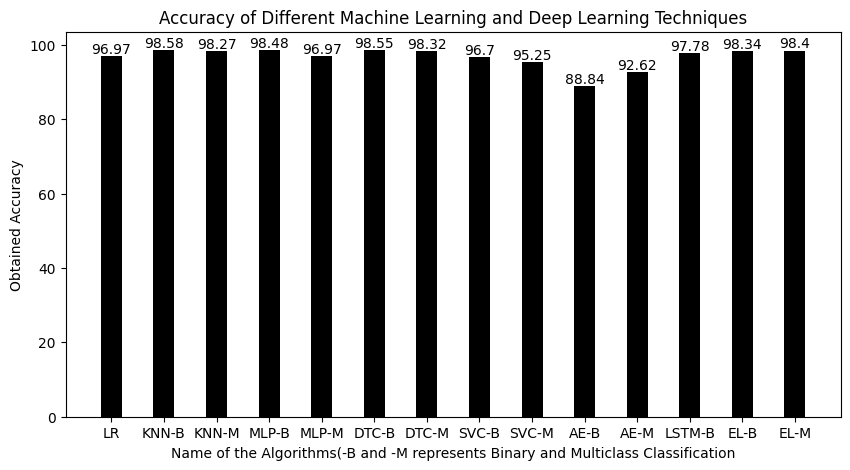

In [275]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'LR':96.97, 
        'KNN-B':98.58,
        'KNN-M':98.27,
        'MLP-B':98.48,
        'MLP-M':96.97,
        'DTC-B':98.55,
        'DTC-M':98.32,
        'SVC-B':96.70,
        'SVC-M':95.25,
        'AE-B':88.84,
        'AE-M':92.62,
        'LSTM-B':97.78,
        'EL-B':98.34,
        'EL-M':98.40}
Names = list(data.keys())
Accuracy = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(Names, Accuracy, color ='Black',width = 0.4)
for i, value in enumerate(Accuracy):
    plt.text(i, value, str(value), ha='center', va='bottom',color="black")
plt.xlabel("Name of the Algorithms(-B and -M represents Binary and Multiclass Classification")
plt.ylabel("Obtained Accuracy")
plt.title("Accuracy of Different Machine Learning and Deep Learning Techniques")
plt.show()

# Ensemble Model

In [276]:
# Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=50)
rf.fit(X_train_binary, Y_train_binary)

RandomForestClassifier(random_state=50)

In [277]:
accuracy1 = rf.score(X_test_binary, Y_test_binary)
print("Accuracy:", accuracy1)

Accuracy: 0.9871721597764653


In [278]:
# Train the Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=100)
gb.fit(X_train_binary, Y_train_binary)

GradientBoostingClassifier(random_state=100)

In [279]:
accuracy2 = gb.score(X_test_binary, Y_test_binary)
print("Accuracy:", accuracy2)

Accuracy: 0.9782498253635613


In [280]:
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='hard')

In [281]:
# Fit the ensemble model on the training data
ensemble_model.fit(X_train_binary, Y_train_binary)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=50)),
                             ('gb',
                              GradientBoostingClassifier(random_state=100))])

In [282]:
accuracy3 = ensemble_model.score(X_test_binary, Y_test_binary)
print("Accuracy:", accuracy3)

Accuracy: 0.9834254143646409


In [283]:
# Train the Random Forest classifier
rfm = RandomForestClassifier(n_estimators=100, random_state=50)
rfm.fit(X_train_multi_Df, Y_train_multi_Df)

RandomForestClassifier(random_state=50)

In [284]:
accuracy4 = rfm.score(X_test_multi_Df, Y_test_multi_Df)
print("Accuracy:", accuracy4)

Accuracy: 0.9854892995491205


In [285]:
# Train the Random Forest classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=100)
gbm.fit(X_train_multi_Df, Y_train_multi_Df)

GradientBoostingClassifier(random_state=100)

In [286]:
accuracy5 = gbm.score(X_test_multi_Df, Y_test_multi_Df)
print("Accuracy:", accuracy5)

Accuracy: 0.9814250333396838


In [287]:
ensemble_model = VotingClassifier(estimators=[('rfm', rfm), ('gbm', gbm)], voting='hard')
# Fit the ensemble model on the training data
ensemble_model.fit(X_train_multi_Df, Y_train_multi_Df)

VotingClassifier(estimators=[('rfm', RandomForestClassifier(random_state=50)),
                             ('gbm',
                              GradientBoostingClassifier(random_state=100))])

In [288]:
accuracy6 = ensemble_model.score(X_test_multi_Df, Y_test_multi_Df)
print("Accuracy:", accuracy6)

Accuracy: 0.9839651997205817


In [289]:
acc = lst.score(X_test, Y_test)
print("Accuracy:", acc)

AttributeError: 'Sequential' object has no attribute 'score'

In [389]:
test_results = lstm.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 3s 3ms/step - loss: 0.7031 - accuracy: 0.0936
Test results - Loss: 0.7031407356262207 - Accuracy: 9.357337653636932%
